# Predicting Flight Ticket Price

## Importing basic libraries

In [2]:
import numpy as np
np.set_printoptions(precision=4)

import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(10, 6))

In [4]:
import seaborn as sns

In [5]:
import category_encoders as ce

In [6]:
from datetime import datetime
from datetime import timedelta
from dateutil.parser import parse

## Importing the training dataset

In [77]:
df = pd.read_excel('data/Data_Train.xlsx')

In [8]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


## Analyzing and Modifying the training dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 500.8+ KB


In [78]:
df[df.Total_Stops.isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [79]:
df = df.dropna()
df.Total_Stops.isnull().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 584.2+ KB


In [13]:
len(df.Airline.unique())

12

In [14]:
df.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [15]:
len(df.Date_of_Journey.unique())

44

In [16]:
len(df.Source.unique())

5

In [17]:
df.Source.value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [18]:
len(df.Destination.unique())

6

In [19]:
df.Destination.value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [20]:
len(df.Route.unique())

128

In [21]:
len(df.Dep_Time.unique())

222

In [22]:
len(df.Arrival_Time.unique())

1343

In [23]:
len(df.Duration.unique())

368

In [24]:
len(df.Total_Stops.unique())

5

In [25]:
df.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [80]:
# Converting to ordinal values 
stops = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
df.Total_Stops = df.Total_Stops.map(stops)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [81]:
df.Total_Stops.value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [29]:
len(df.Additional_Info.unique())

10

In [30]:
df.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [82]:
# Merging two values which are different only in the case of the word 'Info' ie. 'info'/'Info'
df.Additional_Info = df.Additional_Info.str.replace('Info', 'info')
df.Additional_Info.value_counts()

No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [ ]:
# A longer way to convert Duration into minutes
'''
df['Duration_In_Minutes'] = df['Duration'].str.replace('m', '')
df['Duration_In_Minutes'] = df['Duration_In_Minutes'].str.replace('h ', ' ')
df['Duration_In_Minutes'] = df['Duration_In_Minutes'].str.replace('h', ' 00')

def duration_in_mins(text):
    if ' ' in text:
        t = [x.strip() for x in text.split(' ')]
        duration = int(t[0]) * 60 + int(t[1])
    else:
        duration = int(text)
    
    return duration

df['Duration_In_Minutes'] = df['Duration_In_Minutes'].apply(lambda x: duration_in_mins(x))
df
'''

In [83]:
# Function to convert Duration into minutes.
def duration_in_mins(text):
    td = pd.Timedelta(text)
    duration = (td.days * 24 * 60 ) + (td.seconds / 60)
    return duration

In [84]:
# Converting Duration into minutes.
df['Duration_In_Minutes'] = df['Duration'].apply(lambda x: duration_in_mins(x))
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,145.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,930.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,1265.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,1530.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,470.0


In [85]:
# Checking for anomalies in Duration_In_Minutes.
sorted(df.Duration_In_Minutes.unique())

[5.0,
 75.0,
 80.0,
 85.0,
 90.0,
 95.0,
 135.0,
 140.0,
 145.0,
 150.0,
 155.0,
 160.0,
 165.0,
 170.0,
 175.0,
 180.0,
 185.0,
 190.0,
 195.0,
 205.0,
 215.0,
 220.0,
 230.0,
 235.0,
 240.0,
 245.0,
 250.0,
 255.0,
 260.0,
 265.0,
 270.0,
 275.0,
 280.0,
 285.0,
 290.0,
 295.0,
 300.0,
 305.0,
 310.0,
 315.0,
 320.0,
 325.0,
 330.0,
 335.0,
 340.0,
 345.0,
 350.0,
 355.0,
 360.0,
 365.0,
 370.0,
 375.0,
 380.0,
 385.0,
 390.0,
 395.0,
 400.0,
 405.0,
 410.0,
 415.0,
 420.0,
 425.0,
 430.0,
 435.0,
 440.0,
 445.0,
 450.0,
 455.0,
 460.0,
 465.0,
 470.0,
 475.0,
 480.0,
 485.0,
 490.0,
 495.0,
 500.0,
 505.0,
 510.0,
 515.0,
 520.0,
 525.0,
 530.0,
 535.0,
 540.0,
 545.0,
 550.0,
 555.0,
 560.0,
 565.0,
 570.0,
 575.0,
 580.0,
 585.0,
 590.0,
 595.0,
 600.0,
 605.0,
 610.0,
 615.0,
 620.0,
 625.0,
 630.0,
 635.0,
 640.0,
 645.0,
 650.0,
 655.0,
 660.0,
 665.0,
 670.0,
 675.0,
 680.0,
 685.0,
 690.0,
 695.0,
 700.0,
 705.0,
 710.0,
 715.0,
 720.0,
 725.0,
 730.0,
 735.0,
 740.0,
 745.0,

In [86]:
df[df.Duration_In_Minutes == 5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327,5.0


In [34]:
# Removing the anomalies in Duration_In_Minutes.
# df = df.drop([6474], axis=0)

In [87]:
# Instead of removing the row with anomaly, replacing its anomalies with a similar sample.
df[(df.Source == 'Mumbai') & (df.Destination == 'Hyderabad') & (df.Route == 'BOM → GOI → PNQ → HYD')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes
3821,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,21:10,16:55,4h 15m,2,No info,16172,255.0
5309,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,21:10,16:55,4h 15m,2,No info,17327,255.0
5942,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,05:05,16:55,11h 50m,2,No info,16172,710.0
6474,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,17327,5.0
7456,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,05:05,16:55,11h 50m,2,No info,16697,710.0
8478,Air India,6/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,13:30,16:55,3h 25m,2,No info,18797,205.0


In [97]:
df.iloc[6474, 5] = '21:10'
df.iloc[6474, 7] = '4h 15m'
df.iloc[6474, 11] = 255.0

In [100]:
# Creating a bunch of new features from the Date_Of_Journey column.
df['Day'] = [datetime.strptime(x, '%d/%m/%Y').day for x in df.Date_of_Journey]
df['Month'] = [datetime.strptime(x, '%d/%m/%Y').month for x in df.Date_of_Journey]
df['Year'] = [datetime.strptime(x, '%d/%m/%Y').year for x in df.Date_of_Journey]
df['Date'] = [datetime.strptime(x, '%d/%m/%Y').date() for x in df.Date_of_Journey]
df['Weekday'] = [datetime.strptime(x, '%d/%m/%Y').weekday() for x in df.Date_of_Journey]
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes,Day,Month,Year,Date,Weekday
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170.0,24,3,2019,2019-03-24,6
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445.0,1,5,2019,2019-05-01,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140.0,9,6,2019,2019-06-09,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325.0,12,5,2019,2019-05-12,6
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285.0,1,3,2019,2019-03-01,4
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,145.0,24,6,2019,2019-06-24,0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,930.0,12,3,2019,2019-03-12,1
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,1265.0,1,3,2019,2019-03-01,4
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,1530.0,12,3,2019,2019-03-12,1
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,470.0,27,5,2019,2019-05-27,0


In [92]:
# df['Date'] = pd.to_datetime(df['Date'])

In [101]:
# Creating a new feature for the weekday of the Date_Of_Journey.
weekday = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day_Of_Week'] = df['Weekday'].map(weekday)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Day_Of_Week
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170.0,24,3,2019,2019-03-24,6,Sunday
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445.0,1,5,2019,2019-05-01,2,Wednesday
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140.0,9,6,2019,2019-06-09,6,Sunday
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325.0,12,5,2019,2019-05-12,6,Sunday
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285.0,1,3,2019,2019-03-01,4,Friday
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,145.0,24,6,2019,2019-06-24,0,Monday
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,930.0,12,3,2019,2019-03-12,1,Tuesday
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,1265.0,1,3,2019,2019-03-01,4,Friday
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,1530.0,12,3,2019,2019-03-12,1,Tuesday
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,470.0,27,5,2019,2019-05-27,0,Monday


In [102]:
# Creating a feature assessing whether the weekday is weekend or not.
weekend_or_not = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1}
df['Weekend_Or_Not'] = df['Weekday'].map(weekend_or_not)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Day_Of_Week,Weekend_Or_Not
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170.0,24,3,2019,2019-03-24,6,Sunday,1
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445.0,1,5,2019,2019-05-01,2,Wednesday,0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140.0,9,6,2019,2019-06-09,6,Sunday,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325.0,12,5,2019,2019-05-12,6,Sunday,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285.0,1,3,2019,2019-03-01,4,Friday,0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,145.0,24,6,2019,2019-06-24,0,Monday,0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,930.0,12,3,2019,2019-03-12,1,Tuesday,0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,1265.0,1,3,2019,2019-03-01,4,Friday,0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,1530.0,12,3,2019,2019-03-12,1,Tuesday,0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,470.0,27,5,2019,2019-05-27,0,Monday,0


In [ ]:
# Dropping these columns
'''
df['Time_Of_Departure'] = [parse(x).time() for x in df.Dep_Time]
df['Time_Of_Arrival'] = [parse(x).time() for x in df.Arrival_Time]
df
'''

In [103]:
# Extracting Date_Of_Arrival from Arrival_Time.
# Full of '' values as of now, will try to work with it later.
df['Date_Of_Arrival'] = df.Arrival_Time.str.replace('[\d]+:[\d]+[ ]?', '')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Day_Of_Week,Weekend_Or_Not,Date_Of_Arrival
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170.0,24,3,2019,2019-03-24,6,Sunday,1,22 Mar
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445.0,1,5,2019,2019-05-01,2,Wednesday,0,
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140.0,9,6,2019,2019-06-09,6,Sunday,1,10 Jun
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325.0,12,5,2019,2019-05-12,6,Sunday,1,
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285.0,1,3,2019,2019-03-01,4,Friday,0,
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,145.0,24,6,2019,2019-06-24,0,Monday,0,
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,930.0,12,3,2019,2019-03-12,1,Tuesday,0,13 Mar
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,1265.0,1,3,2019,2019-03-01,4,Friday,0,02 Mar
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,1530.0,12,3,2019,2019-03-12,1,Tuesday,0,13 Mar
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,470.0,27,5,2019,2019-05-27,0,Monday,0,


In [104]:
# Replaced '' with 'NaN' for clarity. Still unusable.
df['Date_Of_Arrival'] = df['Date_Of_Arrival'].str.replace('\A\Z', 'NaN')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Day_Of_Week,Weekend_Or_Not,Date_Of_Arrival
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,170.0,24,3,2019,2019-03-24,6,Sunday,1,22 Mar
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445.0,1,5,2019,2019-05-01,2,Wednesday,0,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,1140.0,9,6,2019,2019-06-09,6,Sunday,1,10 Jun
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325.0,12,5,2019,2019-05-12,6,Sunday,1,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285.0,1,3,2019,2019-03-01,4,Friday,0,NaN
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,145.0,24,6,2019,2019-06-24,0,Monday,0,NaN
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087,930.0,12,3,2019,2019-03-12,1,Tuesday,0,13 Mar
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270,1265.0,1,3,2019,2019-03-01,4,Friday,0,02 Mar
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087,1530.0,12,3,2019,2019-03-12,1,Tuesday,0,13 Mar
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,470.0,27,5,2019,2019-05-27,0,Monday,0,NaN


In [105]:
# Clearing the Arrival_Time from Date_Of_Arrival.
df['Arrival_Time'] = df['Arrival_Time'].str.extract('(\d+:\d+)')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Day_Of_Week,Weekend_Or_Not,Date_Of_Arrival
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,3897,170.0,24,3,2019,2019-03-24,6,Sunday,1,22 Mar
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,445.0,1,5,2019,2019-05-01,2,Wednesday,0,NaN
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,13882,1140.0,9,6,2019,2019-06-09,6,Sunday,1,10 Jun
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,325.0,12,5,2019,2019-05-12,6,Sunday,1,NaN
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,285.0,1,3,2019,2019-03-01,4,Friday,0,NaN
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873,145.0,24,6,2019,2019-06-24,0,Monday,0,NaN
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1,In-flight meal not included,11087,930.0,12,3,2019,2019-03-12,1,Tuesday,0,13 Mar
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1,No info,22270,1265.0,1,3,2019,2019-03-01,4,Friday,0,02 Mar
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1,In-flight meal not included,11087,1530.0,12,3,2019,2019-03-12,1,Tuesday,0,13 Mar
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625,470.0,27,5,2019,2019-05-27,0,Monday,0,NaN


In [209]:
# Creating a feature which assigns a particular time period to Dep_Time and Arrival_Time 
bins = [-1, 3, 7, 11, 15, 19, 23]
time_periods = ['Late_Night', 'Early_Morning', 'Morninig_To_Noon', 'Noon_To_Evening', 'Evening_To_Night', 'Night']

In [210]:
# Dep_Time_Timeperiod divides Dep_Time into 6 different time periods.
df['Dep_Time_Timeperiod'] = pd.cut(df.Dep_Time.str.extract('(\A\d{2}):', expand=False).astype(int), bins, labels=time_periods)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,Date,Weekday,Day_Of_Week,Weekend_Or_Not,Date_Of_Arrival,Dep_Time_Timeperiod,Arrival_Time_Timeperiod,Dep_Time_Timeperiod_Encoded,Arrival_Time_Timeperiod_Encoded
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,...,2019,2019-03-24,6,Sunday,1,22 Mar,Night,Late_Night,5.0,0.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,2019,2019-05-01,2,Wednesday,0,NaN,Early_Morning,Noon_To_Evening,1.0,3.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,...,2019,2019-06-09,6,Sunday,1,10 Jun,Morninig_To_Noon,Early_Morning,2.0,1.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,2019,2019-05-12,6,Sunday,1,NaN,Evening_To_Night,Night,4.0,5.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,2019,2019-03-01,4,Friday,0,NaN,Evening_To_Night,Night,4.0,5.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,...,2019,2019-06-24,0,Monday,0,NaN,Morninig_To_Noon,Morninig_To_Noon,2.0,2.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1,In-flight meal not included,...,2019,2019-03-12,1,Tuesday,0,13 Mar,Evening_To_Night,Morninig_To_Noon,4.0,2.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1,No info,...,2019,2019-03-01,4,Friday,0,02 Mar,Morninig_To_Noon,Early_Morning,2.0,1.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1,In-flight meal not included,...,2019,2019-03-12,1,Tuesday,0,13 Mar,Morninig_To_Noon,Morninig_To_Noon,2.0,2.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,...,2019,2019-05-27,0,Monday,0,NaN,Morninig_To_Noon,Evening_To_Night,2.0,4.0


In [211]:
df.Dep_Time_Timeperiod.value_counts()

Morninig_To_Noon    2728
Early_Morning       2353
Evening_To_Night    2177
Night               1692
Noon_To_Evening     1437
Late_Night           295
Name: Dep_Time_Timeperiod, dtype: int64

In [212]:
# # Arrival_Time_Timeperiod divides Arrival_Time into 6 different time periods.
df['Arrival_Time_Timeperiod'] = pd.cut(df.Arrival_Time.str.extract('(\A\d{2}):', expand=False).astype(int), bins, labels=time_periods)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,Date,Weekday,Day_Of_Week,Weekend_Or_Not,Date_Of_Arrival,Dep_Time_Timeperiod,Arrival_Time_Timeperiod,Dep_Time_Timeperiod_Encoded,Arrival_Time_Timeperiod_Encoded
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,...,2019,2019-03-24,6,Sunday,1,22 Mar,Night,Late_Night,5.0,0.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,2019,2019-05-01,2,Wednesday,0,NaN,Early_Morning,Noon_To_Evening,1.0,3.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,...,2019,2019-06-09,6,Sunday,1,10 Jun,Morninig_To_Noon,Early_Morning,2.0,1.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,2019,2019-05-12,6,Sunday,1,NaN,Evening_To_Night,Night,4.0,5.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,2019,2019-03-01,4,Friday,0,NaN,Evening_To_Night,Night,4.0,5.0
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,...,2019,2019-06-24,0,Monday,0,NaN,Morninig_To_Noon,Morninig_To_Noon,2.0,2.0
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1,In-flight meal not included,...,2019,2019-03-12,1,Tuesday,0,13 Mar,Evening_To_Night,Morninig_To_Noon,4.0,2.0
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1,No info,...,2019,2019-03-01,4,Friday,0,02 Mar,Morninig_To_Noon,Early_Morning,2.0,1.0
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1,In-flight meal not included,...,2019,2019-03-12,1,Tuesday,0,13 Mar,Morninig_To_Noon,Morninig_To_Noon,2.0,2.0
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,...,2019,2019-05-27,0,Monday,0,NaN,Morninig_To_Noon,Evening_To_Night,2.0,4.0


In [215]:
# Encoding the different time periods into numeric values, because LabelEncoder won't handle categorical dtype.
time_period_mapping = {'Late_Night':0, 'Early_Morning':1, 'Morninig_To_Noon':2, 'Noon_To_Evening':3, 'Evening_To_Night':4, 'Night':5}
df['Dep_Time_Timeperiod_Encoded'] = df['Dep_Time_Timeperiod'].map(time_period_mapping)
df['Arrival_Time_Timeperiod_Encoded'] = df['Arrival_Time_Timeperiod'].map(time_period_mapping)
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Year,Date,Weekday,Day_Of_Week,Weekend_Or_Not,Date_Of_Arrival,Dep_Time_Timeperiod,Arrival_Time_Timeperiod,Dep_Time_Timeperiod_Encoded,Arrival_Time_Timeperiod_Encoded
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,0,No info,...,2019,2019-03-24,6,Sunday,1,22 Mar,Night,Late_Night,5,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,...,2019,2019-05-01,2,Wednesday,0,NaN,Early_Morning,Noon_To_Evening,1,3
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No info,...,2019,2019-06-09,6,Sunday,1,10 Jun,Morninig_To_Noon,Early_Morning,2,1
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,...,2019,2019-05-12,6,Sunday,1,NaN,Evening_To_Night,Night,4,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,...,2019,2019-03-01,4,Friday,0,NaN,Evening_To_Night,Night,4,5
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,...,2019,2019-06-24,0,Monday,0,NaN,Morninig_To_Noon,Morninig_To_Noon,2,2
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25,15h 30m,1,In-flight meal not included,...,2019,2019-03-12,1,Tuesday,0,13 Mar,Evening_To_Night,Morninig_To_Noon,4,2
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05,21h 5m,1,No info,...,2019,2019-03-01,4,Friday,0,02 Mar,Morninig_To_Noon,Early_Morning,2,1
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25,25h 30m,1,In-flight meal not included,...,2019,2019-03-12,1,Tuesday,0,13 Mar,Morninig_To_Noon,Morninig_To_Noon,2,2
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,...,2019,2019-05-27,0,Monday,0,NaN,Morninig_To_Noon,Evening_To_Night,2,4


## Exploratory Data Analysis

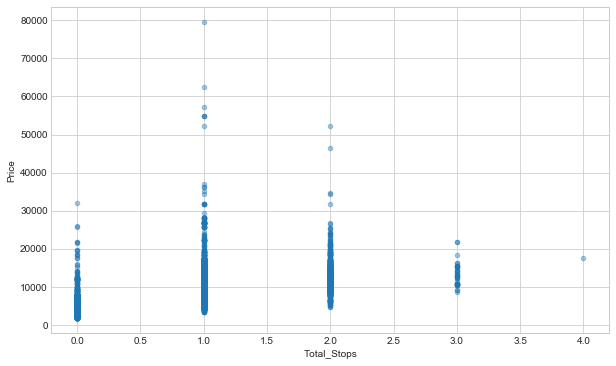

In [138]:
df.plot.scatter('Total_Stops', 'Price', alpha=0.4)

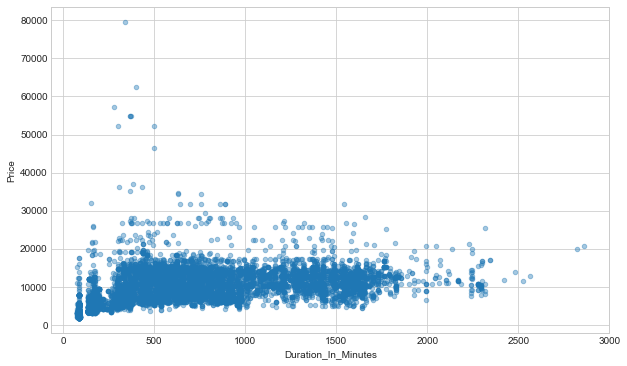

In [139]:
df.plot.scatter('Duration_In_Minutes', 'Price', alpha=0.4)

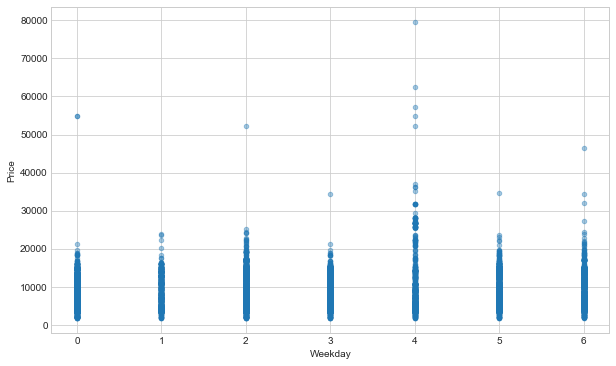

In [140]:
df.plot.scatter('Weekday', 'Price', alpha=0.4)

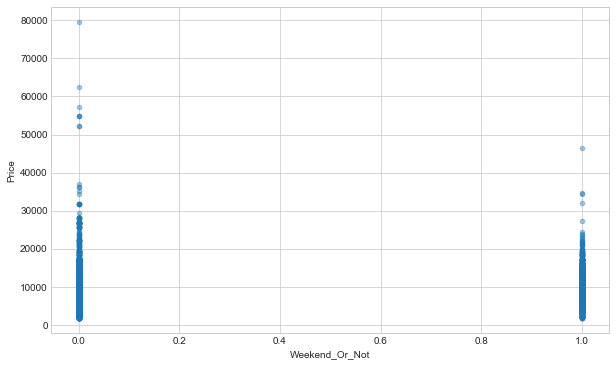

In [141]:
df.plot.scatter('Weekend_Or_Not', 'Price', alpha=0.4)

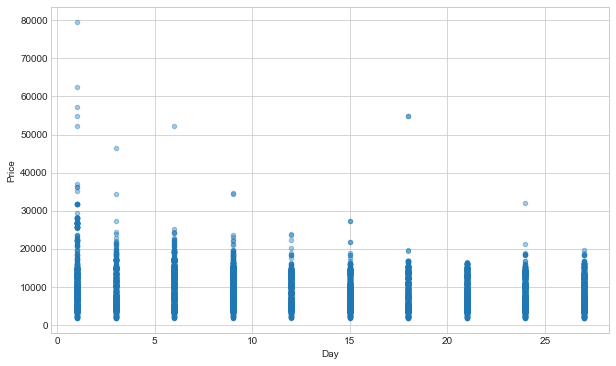

In [142]:
df.plot.scatter('Day', 'Price', alpha=0.4)

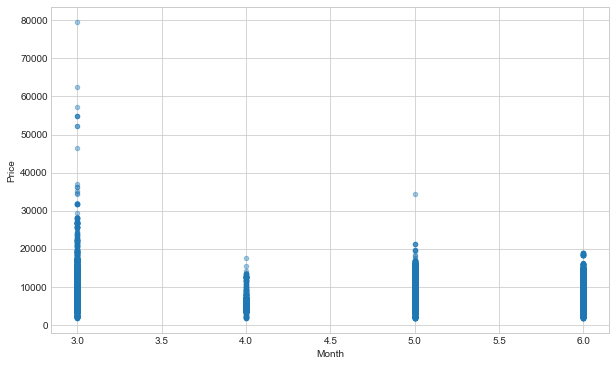

In [143]:
df.plot.scatter('Month', 'Price', alpha=0.4)

In [149]:
corr_mat = df.corr()
corr_mat

,Total_Stops,Price,Duration_In_Minutes,Day,Month,Year,Weekday,Weekend_Or_Not
Total_Stops,1.000000,0.603897,0.738186,-0.009451,0.054383,NaN,-0.036750,-0.019548
Price,0.603897,1.000000,0.506586,-0.153774,-0.103643,NaN,0.051570,0.020275
Duration_In_Minutes,0.738186,0.506586,1.000000,-0.022481,0.014769,NaN,-0.012751,-0.004173
Day,-0.009451,-0.153774,-0.022481,1.000000,-0.038359,NaN,-0.091245,-0.104187
Month,0.054383,-0.103643,0.014769,-0.038359,1.000000,NaN,-0.083345,-0.013189
Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weekday,-0.036750,0.051570,-0.012751,-0.091245,-0.083345,NaN,1.000000,0.815513
Weekend_Or_Not,-0.019548,0.020275,-0.004173,-0.104187,-0.013189,NaN,0.815513,1.000000


## Preparing a baseline model

In [313]:
X = df.iloc[:, [0,2,3,4,5,6,8,9,11,12,13,14,15,16,18,22,23]].values
X

array([['IndiGo', 'Banglore', 'New Delhi', ..., 1, 5, 0],
       ['Air India', 'Kolkata', 'Banglore', ..., 0, 1, 3],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 1, 2, 1],
       ...,
       ['Jet Airways', 'Banglore', 'Delhi', ..., 1, 2, 2],
       ['Vistara', 'Banglore', 'New Delhi', ..., 0, 2, 3],
       ['Air India', 'Delhi', 'Cochin', ..., 0, 2, 4]], dtype=object)

In [314]:
X[0]

array(['IndiGo', 'Banglore', 'New Delhi', 'BLR → DEL', '22:20', '01:10',
       0, 'No info', 170.0, 24, 3, 2019, datetime.date(2019, 3, 24), 6, 1,
       5, 0], dtype=object)

In [249]:
y = df.iloc[:, 10].values
y

array([ 3897,  7662, 13882, ...,  7229, 12648, 11753], dtype=int64)

In [315]:
# Label Encoding various features.
from sklearn.preprocessing import LabelEncoder
labelencoder_airline = LabelEncoder()
X[:, 0] = labelencoder_airline.fit_transform(X[:, 0])

In [316]:
labelencoder_source = LabelEncoder()
X[:, 1] = labelencoder_source.fit_transform(X[:, 1])

In [317]:
labelencoder_destination = LabelEncoder()
X[:, 2] = labelencoder_destination.fit_transform(X[:, 2])

In [318]:
labelencoder_route = LabelEncoder()
X[:, 3] = labelencoder_route.fit_transform(X[:, 3])

In [319]:
labelencoder_deptime = LabelEncoder()
X[:, 4] = labelencoder_deptime.fit_transform(X[:, 4])

In [320]:
labelencoder_arrivaltime = LabelEncoder()
X[:, 5] = labelencoder_arrivaltime.fit_transform(X[:, 5])

In [321]:
labelencoder_addinfo = LabelEncoder()
X[:, 7] = labelencoder_addinfo.fit_transform(X[:, 7])

In [322]:
labelencoder_date = LabelEncoder()
X[:, 12] = labelencoder_date.fit_transform(X[:, 12])

In [229]:
# Splitting dataset into train and validation sets. (80% training, 20% validation)
'''
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
'''

In [258]:
# Creating a Random Forest Regressor.
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200, random_state=42, oob_score=True)

In [259]:
# Performing K-fold Cross-validation.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=regressor, X=X, y=y, cv=5, scoring='r2')

In [260]:
scores

array([0.877 , 0.8746, 0.891 , 0.9085, 0.8495])

In [261]:
scores.mean()

0.8801138025332577

In [262]:
scores.std()

0.019517990088975555

In [263]:
# Fitting the model on whole dataset, for more train samples.
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [264]:
regressor.oob_score_

0.8800661159644261

In [265]:
df_column_names = df.columns
df_column_names

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Duration_In_Minutes', 'Day', 'Month',
       'Year', 'Date', 'Weekday', 'Day_Of_Week', 'Weekend_Or_Not',
       'Date_Of_Arrival', 'Dep_Time_Timeperiod', 'Arrival_Time_Timeperiod',
       'Dep_Time_Timeperiod_Encoded', 'Arrival_Time_Timeperiod_Encoded'],
      dtype='object')

In [266]:
X_column_names = ['Airline', 'Source', 'Destination', 'Route','Dep_Time', 'Arrival_Time', 
                  'Total_Stops','Additional_Info', 'Duration_In_Minutes', 'Day', 'Month',
                  'Year', 'Date', 'Weekday', 'Weekend_Or_Not', 'Dep_Time_Timeperiod_Encoded', 
                  'Arrival_Time_Timeperiod_Encoded']

In [267]:
# Checking feature importances of various features.
for name, score in zip(X_column_names, regressor.feature_importances_):
    print(name, score)

Airline 0.10396264356824872
Source 0.006421269870849772
Destination 0.006028032255214891
Route 0.04520837803325309
Dep_Time 0.029797246400178425
Arrival_Time 0.028949413594449153
Total_Stops 0.04507304833165634
Additional_Info 0.050843702945874564
Duration_In_Minutes 0.4635658337976096
Day 0.019224604402535296
Month 0.00750802751472436
Year 0.0
Date 0.16740756295024822
Weekday 0.008265492622449798
Weekend_Or_Not 0.0025124145475174343
Dep_Time_Timeperiod_Encoded 0.008132946101269668
Arrival_Time_Timeperiod_Encoded 0.007099383063920366


In [268]:
# Removing features with least importances. 
# Removing Year.
X_edit = X[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16]]

In [269]:
X_edit[0]

array([3, 0, 5, 18, 211, 12, 0, 7, 170.0, 24, 3, 8, 6, 1, 5, 0],
      dtype=object)

In [270]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=regressor, X=X_edit, y=y, cv=5, scoring='r2')

In [271]:
scores

array([0.8768, 0.8759, 0.8918, 0.909 , 0.8484])

In [272]:
scores.mean()

0.880375779813852

In [273]:
scores.std()

0.020033617322435318

In [274]:
# Removing Weekend_Or_Not and Year.
X_edit = X[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,15,16]]

In [275]:
X_edit[0]

array([3, 0, 5, 18, 211, 12, 0, 7, 170.0, 24, 3, 8, 6, 5, 0], dtype=object)

In [276]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=regressor, X=X_edit, y=y, cv=5, scoring='r2')

In [277]:
scores

array([0.8778, 0.8746, 0.8922, 0.9086, 0.848 ])

In [278]:
scores.mean()

0.8802615649277884

In [279]:
scores.std()

0.02010955828048739

In [323]:
# Removing Route and Dep_Time, because of Test set. Year is removed too.
X_edit = X[:, [0,1,2,5,6,7,8,9,10,12,13,14,15,16]]

In [324]:
X_edit[0]

array([3, 0, 5, 12, 0, 7, 170.0, 24, 3, 8, 6, 1, 5, 0], dtype=object)

In [325]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=regressor, X=X_edit, y=y, cv=5, scoring='r2')

In [326]:
scores

array([0.8601, 0.8569, 0.8767, 0.9035, 0.8482])

In [327]:
scores.mean()

0.8690549675976487

In [328]:
scores.std()

0.019552596545556997

In [329]:
X = X[:, [0,1,2,5,6,7,8,9,10,12,13,14,15,16]]

In [345]:
X[0]

array([3, 0, 5, 12, 0, 7, 170.0, 24, 3, 8, 6, 1, 5, 0], dtype=object)

In [330]:
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [331]:
regressor.score(X, y)

0.9779660343766436

In [332]:
regressor.oob_score_

0.8682040710164993

## Importing test set 

In [291]:
df_test = pd.read_excel('data/Test_set.xlsx')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info


## Analyzing and modifying the test set

In [292]:
df_test.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [293]:
df_test.Source.value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [294]:
df_test.Destination.value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [295]:
len(df_test.Route.unique())

100

In [296]:
df_test.Additional_Info.value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

In [297]:
df_test.Total_Stops = df_test.Total_Stops.map(stops)
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1,In-flight meal not included
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info


In [298]:
df_test.Total_Stops.value_counts()

1    1431
0     849
2     379
3      11
4       1
Name: Total_Stops, dtype: int64

In [299]:
df_test['Duration_In_Minutes'] = df_test['Duration'].apply(lambda x: duration_in_mins(x))
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,655.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,240.0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,1425.0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,780.0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,170.0
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1,In-flight meal not included,1100.0
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,905.0
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,315.0
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,165.0
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,365.0


In [300]:
sorted(df_test.Duration_In_Minutes.unique())

[5.0,
 75.0,
 80.0,
 85.0,
 90.0,
 95.0,
 135.0,
 140.0,
 145.0,
 150.0,
 155.0,
 160.0,
 165.0,
 170.0,
 175.0,
 180.0,
 185.0,
 190.0,
 195.0,
 220.0,
 225.0,
 240.0,
 245.0,
 250.0,
 260.0,
 265.0,
 270.0,
 275.0,
 280.0,
 285.0,
 290.0,
 295.0,
 300.0,
 305.0,
 310.0,
 315.0,
 320.0,
 325.0,
 330.0,
 335.0,
 340.0,
 345.0,
 350.0,
 355.0,
 360.0,
 365.0,
 370.0,
 375.0,
 380.0,
 385.0,
 390.0,
 395.0,
 400.0,
 405.0,
 410.0,
 415.0,
 420.0,
 425.0,
 430.0,
 435.0,
 440.0,
 445.0,
 450.0,
 455.0,
 460.0,
 465.0,
 470.0,
 475.0,
 480.0,
 485.0,
 490.0,
 495.0,
 500.0,
 505.0,
 510.0,
 515.0,
 520.0,
 525.0,
 530.0,
 535.0,
 540.0,
 545.0,
 550.0,
 555.0,
 560.0,
 565.0,
 570.0,
 575.0,
 580.0,
 585.0,
 590.0,
 595.0,
 600.0,
 605.0,
 610.0,
 615.0,
 620.0,
 625.0,
 630.0,
 635.0,
 640.0,
 645.0,
 650.0,
 655.0,
 660.0,
 665.0,
 670.0,
 675.0,
 680.0,
 685.0,
 690.0,
 695.0,
 700.0,
 705.0,
 710.0,
 715.0,
 720.0,
 725.0,
 730.0,
 735.0,
 740.0,
 745.0,
 750.0,
 755.0,
 760.0,
 765.0,

In [301]:
df_test[df_test.Duration_In_Minutes == 5]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,5.0


In [302]:
df_test[(df_test.Source == 'Mumbai') & (df_test.Destination == 'Hyderabad') & (df_test.Route == 'BOM → GOI → PNQ → HYD')]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes
2660,Air India,12/03/2019,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,16:50,16:55,5m,2,No info,5.0


In [303]:
# Instead of dropping the anomalous sample, replacing the anomalies with a similar sample from test set.
# df_test = df_test.drop([2660], axis=0)
df_test.iloc[2660, 5] = '21:10'
df_test.iloc[2660, 7] = '4h 15m'
df_test.iloc[2660, 10] = 255.0

In [304]:
df_test.iloc[2660]

Airline                            Air India
Date_of_Journey                   12/03/2019
Source                                Mumbai
Destination                        Hyderabad
Route                  BOM → GOI → PNQ → HYD
Dep_Time                               21:10
Arrival_Time                           16:55
Duration                              4h 15m
Total_Stops                                2
Additional_Info                      No info
Duration_In_Minutes                      255
Name: 2660, dtype: object

In [305]:
# Using a different method than train set
df_test['Day'] = [x.day for x in pd.to_datetime(df_test.Date_of_Journey, dayfirst=True)]
df_test['Month'] = [x.month for x in pd.to_datetime(df_test.Date_of_Journey, dayfirst=True)]
df_test['Year'] = [x.year for x in pd.to_datetime(df_test.Date_of_Journey, dayfirst=True)]
df_test['Date'] = [x.date() for x in pd.to_datetime(df_test.Date_of_Journey, dayfirst=True)]
df_test['Weekday'] = [x.weekday() for x in pd.to_datetime(df_test.Date_of_Journey, dayfirst=True)]
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes,Day,Month,Year,Date,Weekday
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,655.0,6,6,2019,2019-06-06,3
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,240.0,12,5,2019,2019-05-12,6
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,1425.0,21,5,2019,2019-05-21,1
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,780.0,21,5,2019,2019-05-21,1
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,170.0,24,6,2019,2019-06-24,0
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1,In-flight meal not included,1100.0,12,6,2019,2019-06-12,2
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,905.0,12,3,2019,2019-03-12,1
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,315.0,1,5,2019,2019-05-01,2
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,165.0,15,3,2019,2019-03-15,4
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,365.0,18,5,2019,2019-05-18,5


In [306]:
weekend_or_not = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 1, 6: 1}
df_test['Weekend_Or_Not'] = df_test['Weekday'].map(weekend_or_not)
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Weekend_Or_Not
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,655.0,6,6,2019,2019-06-06,3,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,240.0,12,5,2019,2019-05-12,6,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,1425.0,21,5,2019,2019-05-21,1,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,780.0,21,5,2019,2019-05-21,1,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,170.0,24,6,2019,2019-06-24,0,0
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1,In-flight meal not included,1100.0,12,6,2019,2019-06-12,2,0
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,905.0,12,3,2019,2019-03-12,1,0
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,315.0,1,5,2019,2019-05-01,2,0
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,165.0,15,3,2019,2019-03-15,4,0
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,365.0,18,5,2019,2019-05-18,5,1


In [307]:
df_test['Date_Of_Arrival'] = df_test.Arrival_Time.str.replace('[\d]+:[\d]+[ ]?', '')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Weekend_Or_Not,Date_Of_Arrival
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1,No info,655.0,6,6,2019,2019-06-06,3,0,07 Jun
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,240.0,12,5,2019,2019-05-12,6,1,
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1,In-flight meal not included,1425.0,21,5,2019,2019-05-21,1,0,22 May
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,780.0,21,5,2019,2019-05-21,1,0,
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,0,No info,170.0,24,6,2019,2019-06-24,0,0,25 Jun
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1,In-flight meal not included,1100.0,12,6,2019,2019-06-12,2,0,13 Jun
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,905.0,12,3,2019,2019-03-12,1,0,
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,315.0,1,5,2019,2019-05-01,2,0,
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,165.0,15,3,2019,2019-03-15,4,0,
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,365.0,18,5,2019,2019-05-18,5,1,


In [308]:
df_test['Arrival_Time'] = df_test['Arrival_Time'].str.extract('(\d+:\d+)')
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Weekend_Or_Not,Date_Of_Arrival
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,655.0,6,6,2019,2019-06-06,3,0,07 Jun
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,240.0,12,5,2019,2019-05-12,6,1,
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,1425.0,21,5,2019,2019-05-21,1,0,22 May
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,780.0,21,5,2019,2019-05-21,1,0,
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,170.0,24,6,2019,2019-06-24,0,0,25 Jun
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35,18h 20m,1,In-flight meal not included,1100.0,12,6,2019,2019-06-12,2,0,13 Jun
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,905.0,12,3,2019,2019-03-12,1,0,
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,315.0,1,5,2019,2019-05-01,2,0,
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,165.0,15,3,2019,2019-03-15,4,0,
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,365.0,18,5,2019,2019-05-18,5,1,


In [334]:
# Dep_Time_Timeperiod divides Dep_Time into 6 different time periods.
df_test['Dep_Time_Timeperiod'] = pd.cut(df_test.Dep_Time.str.extract('(\A\d{2}):', expand=False).astype(int), bins, labels=time_periods)
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Weekend_Or_Not,Date_Of_Arrival,Dep_Time_Timeperiod
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,655.0,6,6,2019,2019-06-06,3,0,07 Jun,Evening_To_Night
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,240.0,12,5,2019,2019-05-12,6,1,,Early_Morning
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,1425.0,21,5,2019,2019-05-21,1,0,22 May,Evening_To_Night
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,780.0,21,5,2019,2019-05-21,1,0,,Morninig_To_Noon
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,170.0,24,6,2019,2019-06-24,0,0,25 Jun,Night
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35,18h 20m,1,In-flight meal not included,1100.0,12,6,2019,2019-06-12,2,0,13 Jun,Evening_To_Night
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,905.0,12,3,2019,2019-03-12,1,0,,Early_Morning
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,315.0,1,5,2019,2019-05-01,2,0,,Noon_To_Evening
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,165.0,15,3,2019,2019-03-15,4,0,,Morninig_To_Noon
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,365.0,18,5,2019,2019-05-18,5,1,,Evening_To_Night


In [336]:
df_test.Dep_Time_Timeperiod.value_counts()

Morninig_To_Noon    686
Early_Morning       572
Evening_To_Night    535
Night               436
Noon_To_Evening     384
Late_Night           58
Name: Dep_Time_Timeperiod, dtype: int64

In [337]:
# # Arrival_Time_Timeperiod divides Arrival_Time into 6 different time periods.
df_test['Arrival_Time_Timeperiod'] = pd.cut(df_test.Arrival_Time.str.extract('(\A\d{2}):', expand=False).astype(int), bins, labels=time_periods)
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Duration_In_Minutes,Day,Month,Year,Date,Weekday,Weekend_Or_Not,Date_Of_Arrival,Dep_Time_Timeperiod,Arrival_Time_Timeperiod
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,655.0,6,6,2019,2019-06-06,3,0,07 Jun,Evening_To_Night,Early_Morning
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,240.0,12,5,2019,2019-05-12,6,1,,Early_Morning,Morninig_To_Noon
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,1425.0,21,5,2019,2019-05-21,1,0,22 May,Evening_To_Night,Evening_To_Night
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,780.0,21,5,2019,2019-05-21,1,0,,Morninig_To_Noon,Night
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,170.0,24,6,2019,2019-06-24,0,0,25 Jun,Night,Late_Night
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35,18h 20m,1,In-flight meal not included,1100.0,12,6,2019,2019-06-12,2,0,13 Jun,Evening_To_Night,Noon_To_Evening
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,905.0,12,3,2019,2019-03-12,1,0,,Early_Morning,Night
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,315.0,1,5,2019,2019-05-01,2,0,,Noon_To_Evening,Night
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,165.0,15,3,2019,2019-03-15,4,0,,Morninig_To_Noon,Noon_To_Evening
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,365.0,18,5,2019,2019-05-18,5,1,,Evening_To_Night,Night


In [338]:
# Encoding the different time periods into numeric values, because LabelEncoder won't handle categorical dtype.
df_test['Dep_Time_Timeperiod_Encoded'] = df_test['Dep_Time_Timeperiod'].map(time_period_mapping)
df_test['Arrival_Time_Timeperiod_Encoded'] = df_test['Arrival_Time_Timeperiod'].map(time_period_mapping)
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Month,Year,Date,Weekday,Weekend_Or_Not,Date_Of_Arrival,Dep_Time_Timeperiod,Arrival_Time_Timeperiod,Dep_Time_Timeperiod_Encoded,Arrival_Time_Timeperiod_Encoded
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25,10h 55m,1,No info,...,6,2019,2019-06-06,3,0,07 Jun,Evening_To_Night,Early_Morning,4,1
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1,No info,...,5,2019,2019-05-12,6,1,,Early_Morning,Morninig_To_Noon,1,2
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00,23h 45m,1,In-flight meal not included,...,5,2019,2019-05-21,1,0,22 May,Evening_To_Night,Evening_To_Night,4,4
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1,No info,...,5,2019,2019-05-21,1,0,,Morninig_To_Noon,Night,2,5
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45,2h 50m,0,No info,...,6,2019,2019-06-24,0,0,25 Jun,Night,Late_Night,5,0
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35,18h 20m,1,In-flight meal not included,...,6,2019,2019-06-12,2,0,13 Jun,Evening_To_Night,Noon_To_Evening,4,3
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1,No info,...,3,2019,2019-03-12,1,0,,Early_Morning,Night,1,5
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1,No info,...,5,2019,2019-05-01,2,0,,Noon_To_Evening,Night,3,5
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,0,No info,...,3,2019,2019-03-15,4,0,,Morninig_To_Noon,Noon_To_Evening,2,3
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1,No info,...,5,2019,2019-05-18,5,1,,Evening_To_Night,Night,4,5


## Making predictions based on baseline model

In [357]:
X_test = df_test.iloc[:, [0,2,3,4,5,6,8,9,10,11,12,13,14,15,16,20,21]].values
X_test

array([['Jet Airways', 'Delhi', 'Cochin', ..., 0, 4, 1],
       ['IndiGo', 'Kolkata', 'Banglore', ..., 1, 1, 2],
       ['Jet Airways', 'Delhi', 'Cochin', ..., 0, 4, 4],
       ...,
       ['Jet Airways', 'Delhi', 'Cochin', ..., 0, 5, 1],
       ['Air India', 'Delhi', 'Cochin', ..., 0, 1, 4],
       ['Multiple carriers', 'Delhi', 'Cochin', ..., 1, 1, 4]],
      dtype=object)

In [358]:
X_test[0]

array(['Jet Airways', 'Delhi', 'Cochin', 'DEL → BOM → COK', '17:30',
       '04:25', 1, 'No info', 655.0, 6, 6, 2019,
       datetime.date(2019, 6, 6), 3, 0, 4, 1], dtype=object)

In [359]:
# Removing features with low feature importance.
X_test = X_test[:, [0,1,2,5,6,7,8,9,10,12,13,14,15,16]]

In [360]:
X_test[0]

array(['Jet Airways', 'Delhi', 'Cochin', '04:25', 1, 'No info', 655.0, 6,
       6, datetime.date(2019, 6, 6), 3, 0, 4, 1], dtype=object)

In [361]:
# Label encoding the features.
X_test[:, 0] = labelencoder_airline.transform(X_test[:, 0])

In [362]:
X_test[:, 1] = labelencoder_source.transform(X_test[:, 1])

In [363]:
X_test[:, 2] = labelencoder_destination.transform(X_test[:, 2])

In [364]:
X_test[:, 3] = labelencoder_arrivaltime.transform(X_test[:, 3])

In [365]:
X_test[:, 5] = labelencoder_addinfo.transform(X_test[:, 5])

In [366]:
X_test[:, 9] = labelencoder_date.transform(X_test[:, 9])

In [367]:
y_pred = regressor.predict(X_test)

In [368]:
y_pred

array([14715.05  ,  4537.825 , 12898.    , ..., 16483.1242, 14089.215 ,
        7452.6155])

In [370]:
pred_df  = pd.DataFrame(y_pred, columns=['Price'])
pred_df

,Price
0,14715.050000
1,4537.825000
2,12898.000000
3,13004.420833
4,3604.805000
5,10265.150000
6,10815.195000
7,5150.660000
8,4570.970000
9,14668.500000


In [371]:
pred_df.to_excel('Price_Prediction.xlsx', index=False)